In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/intership_2022/ml/project_work/K_nearest_neaver/Social_Network_Ads.csv')

In [6]:
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [7]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
X1=dataset.iloc[:,[3,1]].values
X11=dataset[['Age','EstimatedSalary']]
y1=dataset['Purchased']

In [9]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:,2:4].values
# Extracting dependent variable:
y = dataset.iloc[:, 4].values

In [ ]:
X

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) X_scaled = X_std * (max - min) + min where min, max = feature_range.

This transformation is often used as an alternative to zero mean, unit variance scaling.

MinMaxScaler  -> data  0  to 1  value raha ga

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[64  4]
 [ 3 29]]


In [16]:
# calculate Accuracy
#               Y_pred
#             0       1
#          0[64     4(FP)]  Type 1 Error
# y-test   1[3(FN)     29]  Type 2 Error
# Accuracy 64+29/64+4+3+29
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 93.00


In [17]:
from sklearn.metrics import precision_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
#               Y_pred
#             0       1
#          0[64     4(FP)]  Type 1 Error
# y-test   1[3(FN)     29]  Type 2 Error
# precision= 29/29+4
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))

Precision: 87.879


In [18]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
#               Y_pred
#             0       1
#          0[64     4(FP)]  Type 1 Error
# y-test   1[3(FN)     29]  Type 2 Error
# precision= 29/29+3
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))

Recall: 90.625


In [19]:
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# score= (2*87.879* 90.625)/87.879+ 90.625
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 89.231


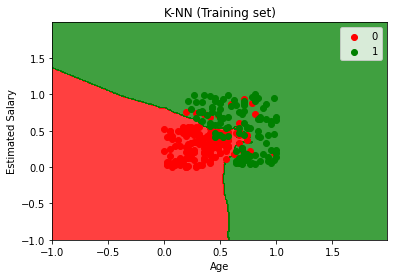

In [25]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

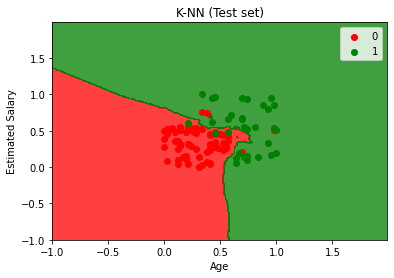

In [24]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [28]:
# save the model to disk
import joblib
filename = '/content/drive/My Drive/intership_2022/ml/project_work/K_nearest_neaver/finalized_modelKNN.sav'
joblib.dump(classifier, filename)

['/content/drive/My Drive/intership_2022/ml/project_work/K_nearest_neaver/finalized_modelKNN.sav']

In [29]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.93


In [30]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/intership_2022/ml/project_work/K_nearest_neaver/finalized_modelKNN.sav', 'wb')) 

[INFO] Saving model...


In [31]:
# Saving model to disk
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/intership_2022/ml/project_work/K_nearest_neaver/finalized_modelKNN.sav', 'rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
!pip install streamlit==1.1.0

In [33]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 9.2 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=6119ae9787c9f782b3da6d3428a99c960e919c9dddcd0f3f19f7c5812ad449df
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [34]:
!ngrok authtoken 2CT4L1Qz5Kjm1ApbwHixPZkJ9cv_5pCAaY2RemGBmeLEvc2yc

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [35]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://6fb1-34-86-118-208.ngrok.io" -> "http://localhost:80">

In [37]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
pickle_in = open("/content/drive/My Drive/intership_2022/ml/project_work/K_nearest_neaver/finalized_modelKNN.sav","rb")
model=pickle.load(pickle_in)
dataset= pd.read_csv('/content/drive/My Drive/intership_2022/ml/project_work/K_nearest_neaver/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
def predict_note_authentication(UserID, Gender,Age,EstimatedSalary):
  output= model.predict(sc.transform([[Age,EstimatedSalary]]))
  print("Purchased", output)
  if output==[1]:
    prediction="Item will be purchased"
  else:
    prediction="Item will not be purchased"
  print(prediction)
  return prediction
def main():
    
    html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;">Internship Project Deployment</p></center> 
   </div>
   </div>
   </div>
   """
    st.markdown(html_temp,unsafe_allow_html=True)
    st.header("Item Purchase Prediction")
    UserID = st.text_input("UserID","")
    Gender = st.selectbox('Gender',('Male', 'Female', 'Others'))
    Age = st.number_input("Insert Age",18,60)
    EstimatedSalary = st.number_input("Insert salary",15000,150000)
    resul=""
    if st.button("Predict"):
      result=predict_note_authentication(UserID, Gender,Age,EstimatedSalary)
      st.success('Model has predicted {}'.format(result))
    if st.button("About"):
      st.subheader("Developed by ISHU")
      st.subheader(" Department of Computer Engineering")

if __name__=='__main__':
  main()
   


Writing app.py


In [38]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [39]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://c400-34-86-118-208.ngrok.io" -> "http://localhost:80">

In [40]:
!streamlit run --server.port 80 app.py

2022-08-01 05:05:14.481 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.86.118.208:80

Purchased [0]
Item will not be purchased
  Stopping...
